# Run Bias Analysis On Dataset Using SageMaker Clarify
https://github.com/aws/amazon-sagemaker-clarify


In [1]:
!pip install -q smclarify==0.1

In [2]:
!pip list | grep smclarify

smclarify                          0.1


In [3]:
from smclarify.bias import report
from typing import Dict
from collections import defaultdict
import pandas as pd
import seaborn as sns

# Read Dataset From S3

In [4]:
%store -r bias_data_s3_uri

In [5]:
print(bias_data_s3_uri)

s3://sagemaker-us-east-1-231218423789/data/amazon_reviews_us_giftcards_software_videogames.csv


In [6]:
%store -r balanced_bias_data_s3_uri

In [7]:
print(balanced_bias_data_s3_uri)

s3://sagemaker-us-east-1-231218423789/data/amazon_reviews_us_giftcards_software_videogames_balanced.csv


In [8]:
!aws s3 cp $bias_data_s3_uri ./data/

download: s3://sagemaker-us-east-1-231218423789/data/amazon_reviews_us_giftcards_software_videogames.csv to data/amazon_reviews_us_giftcards_software_videogames.csv


In [9]:
!aws s3 cp $balanced_bias_data_s3_uri ./data/

download: s3://sagemaker-us-east-1-231218423789/data/amazon_reviews_us_giftcards_software_videogames_balanced.csv to data/amazon_reviews_us_giftcards_software_videogames_balanced.csv


In [10]:
df = pd.read_csv('./data/amazon_reviews_us_giftcards_software_videogames.csv')
df.shape

(396601, 15)

In [11]:
df_balanced = pd.read_csv('./data/amazon_reviews_us_giftcards_software_videogames_balanced.csv')
df_balanced.shape

(81040, 15)

# Visualize Data

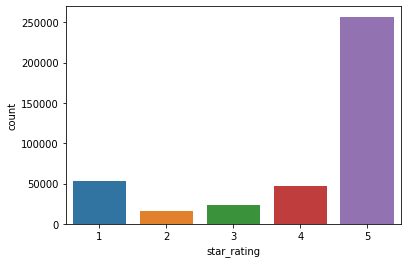

In [15]:
sns.countplot(df['star_rating'])

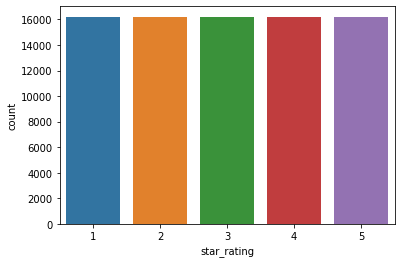

In [16]:
sns.countplot(df_balanced['star_rating'])

# Show Number of Reviews per Category and Star Rating

In [17]:
df_balanced.shape

(81040, 15)

In [20]:
num_stars = df_balanced.groupby(['star_rating'], sort=False).size().reset_index(name='Count')
print(num_stars)

   star_rating  Count
0            5  16208
1            4  16208
2            3  16208
3            2  16208
4            1  16208


In [18]:
num = df_balanced.groupby(['product_category','star_rating'], sort=False).size().reset_index(name='Count')
print(num)

       product_category  star_rating  Count
0             Gift Card            5   8198
1   Digital_Video_Games            5   5133
2      Digital_Software            5   2877
3   Digital_Video_Games            4   7151
4      Digital_Software            4   5739
5             Gift Card            4   3318
6   Digital_Video_Games            3   8178
7      Digital_Software            3   5858
8             Gift Card            3   2172
9      Digital_Software            2   6890
10  Digital_Video_Games            2   7749
11            Gift Card            2   1569
12     Digital_Software            1   7192
13            Gift Card            1   1394
14  Digital_Video_Games            1   7622


# Calculate Pre-Training Bias Metrics

## Define 
* Facet Column (= Product Category), 
* Label Column (= Star Rating), 
* Positive Label Value (= 5)

In [54]:
facet_column = report.FacetColumn(name='product_category')
label_column = report.LabelColumn(name='star_rating', 
                                  data=df_balanced['star_rating'], 
                                  positive_label_values=[5] # this doesn't matter for class imbalance bias
                                 )
group_variable = df_balanced["marketplace"]


## Run SageMaker Clarify Bias Report

In [55]:
report.bias_report(df_balanced, 
                   facet_column, 
                   label_column, 
                   stage_type=report.StageType.PRE_TRAINING, 
                   group_variable=group_variable
                  )

[{'value_or_threshold': 'Gift Card',
  'metrics': [{'name': 'CDDL',
    'description': 'Conditional Demographic Disparity in Labels (CDDL)',
    'value': -0.3754164610069102},
   {'name': 'CI',
    'description': 'Class Imbalance (CI)',
    'value': 0.5890671273445213},
   {'name': 'DPL',
    'description': 'Difference in Positive Proportions in Labels (DPL)',
    'value': -0.3679426717770344},
   {'name': 'JS',
    'description': 'Jensen-Shannon Divergence (JS)',
    'value': 0.11632161004661548},
   {'name': 'KL',
    'description': 'Kullback-Liebler Divergence (KL)',
    'value': 0.3061581684888518},
   {'name': 'KS',
    'description': 'Kolmogorov-Smirnov Distance (KS)',
    'value': 0.36794267177703444},
   {'name': 'LP', 'description': 'L-p Norm (LP)', 'value': 0.5203495166028743},
   {'name': 'TVD',
    'description': 'Total Variation Distance (TVD)',
    'value': 0.36794267177703444}]},
 {'value_or_threshold': 'Digital_Video_Games',
  'metrics': [{'name': 'CDDL',
    'descripti

# EXTRA: Create A Completely Balanced Dataset Across Categories AND Star Ratings

In [56]:
# df_giftcard5 = df_balanced.query('star_rating==5 and product_category=="Gift Card"')
# df_giftcard5=df_giftcard5[:343]
# df_giftcard5.shape

In [57]:
# df_giftcard4 = df_balanced.query('star_rating==4 and product_category=="Gift Card"')
# df_giftcard4=df_giftcard4[:343]
# df_giftcard4.shape

In [58]:
# df_giftcard3 = df_balanced.query('star_rating==3 and product_category=="Gift Card"')
# df_giftcard3=df_giftcard3[:343]
# df_giftcard3.shape

In [59]:
# df_giftcard2 = df_balanced.query('star_rating==2 and product_category=="Gift Card"')
# df_giftcard2=df_giftcard2[:343]
# df_giftcard2.shape

In [60]:
# df_giftcard1 = df_balanced.query('star_rating==1 and product_category=="Gift Card"')
# df_giftcard1=df_giftcard1[:343]
# df_giftcard1.shape

In [61]:
# df_videogames5 = df_balanced.query('star_rating==5 and product_category=="Digital_Video_Games"')
# df_videogames5=df_videogames5[:343]
# df_videogames5.shape

In [62]:
# df_videogames4 = df_balanced.query('star_rating==4 and product_category=="Digital_Video_Games"')
# df_videogames4=df_videogames4[:343]
# df_videogames4.shape

In [63]:
# df_videogames3 = df_balanced.query('star_rating==3 and product_category=="Digital_Video_Games"')
# df_videogames3=df_videogames3[:343]
# df_videogames3.shape

In [64]:
# df_videogames2 = df_balanced.query('star_rating==2 and product_category=="Digital_Video_Games"')
# df_videogames2=df_videogames2[:343]
# df_videogames2.shape

In [65]:
# df_videogames1 = df_balanced.query('star_rating==1 and product_category=="Digital_Video_Games"')
# df_videogames1=df_videogames1[:343]
# df_videogames1.shape

In [66]:
# df_software5 = df_balanced.query('star_rating==5 and product_category=="Digital_Software"')
# df_software5=df_software5[:343]
# df_software5.shape

In [67]:
# df_software4 = df_balanced.query('star_rating==4 and product_category=="Digital_Software"')
# df_software4=df_software4[:343]
# df_software4.shape

In [68]:
# df_software3 = df_balanced.query('star_rating==3 and product_category=="Digital_Software"')
# df_software3=df_software3[:343]
# df_software3.shape

In [69]:
# df_software2 = df_balanced.query('star_rating==2 and product_category=="Digital_Software"')
# df_software2=df_software2[:343]
# df_software2.shape

In [70]:
# df_software1 = df_balanced.query('star_rating==1 and product_category=="Digital_Software"')
# df_software1=df_software1[:343]
# df_software1.shape

## Generate 4th Sample

In [71]:
# df_bla5 = df_balanced.query('star_rating==5 and product_category=="Digital_Software"')
# df_bla5['product_category'] = 'bla' # df_bla5['product_category'].str.replace('Digital_Software', 'bla')
# df_bla5=df_bla5[:343]
# df_bla5.shape

In [72]:
# df_bla4 = df_balanced.query('star_rating==4 and product_category=="Digital_Software"')
# df_bla4['product_category'] = 'bla' # df_bla4['product_category'].str.replace('Digital_Software', 'bla')
# df_bla4=df_bla4[:343]
# df_bla4.shape

In [73]:
# df_bla3 = df_balanced.query('star_rating==3 and product_category=="Digital_Software"')
# df_bla3['product_category'] = 'bla' # df_bla3['product_category'].str.replace('Digital_Software', 'bla')

# df_bla3=df_bla3[:343]
# df_bla3.shape

In [74]:
# df_bla2 = df_balanced.query('star_rating==2 and product_category=="Digital_Software"')
# df_bla2['product_category'] = 'bla' # df_bla2['product_category'].str.replace('Digital_Software', 'bla')

# df_bla2=df_bla2[:343]
# df_bla2.shape

In [75]:
# df_bla1 = df_balanced.query('star_rating==1 and product_category=="Digital_Software"')
# df_bla1['product_category'] = 'bla' # df_bla1['product_category'].str.replace('Digital_Software', 'bla')
# df_bla1=df_bla1[:343]
# df_bla1.shape

## Generate 5th Sample

In [76]:
# df_blah5 = df_balanced.query('star_rating==5 and product_category=="Digital_Software"')
# df_blah5['product_category'] = 'blah' # df_bla5['product_category'].str.replace('Digital_Software', 'bla')
# df_blah5=df_blah5[:343]
# df_blah5.shape

In [77]:
# df_blah4 = df_balanced.query('star_rating==4 and product_category=="Digital_Software"')
# df_blah4['product_category'] = 'blah' # df_bla4['product_category'].str.replace('Digital_Software', 'bla')
# df_blah4=df_blah4[:343]
# df_blah4.shape

In [78]:
# df_blah3 = df_balanced.query('star_rating==3 and product_category=="Digital_Software"')
# df_blah3['product_category'] = 'bla' # df_bla3['product_category'].str.replace('Digital_Software', 'bla')

# df_blah3=df_blah3[:343]
# df_blah3.shape

In [79]:
# df_blah2 = df_balanced.query('star_rating==2 and product_category=="Digital_Software"')
# df_blah2['product_category'] = 'blah' # df_bla2['product_category'].str.replace('Digital_Software', 'bla')

# df_blah2=df_blah2[:343]
# df_blah2.shape

In [80]:
# df_blah1 = df_balanced.query('star_rating==1 and product_category=="Digital_Software"')
# df_blah1['product_category'] = 'blah' # df_bla1['product_category'].str.replace('Digital_Software', 'bla')
# df_blah1=df_blah1[:343]
# df_blah1.shape

# Concatenate All Data Frames Into `Super` Balanced Data Frame

In [81]:
# df_super_balanced = pd.concat([df_giftcard5, 
# #                               df_giftcard4, 
#                                df_giftcard3, 
# #                               df_giftcard2, 
#                                df_giftcard1, 
#                                df_videogames5, 
# #                               df_videogames4, 
#                                df_videogames3, 
# #                               df_videogames2, 
#                                df_videogames1, 
#                               df_software5, 
# #                               df_software4, 
#                                df_software3, 
# #                               df_software2, 
#                               df_software1,
# #                               df_bla5,
# #                                df_bla4,
# #                                df_bla3,
# #                                df_bla2,                               
# #                               df_bla1,
# #                               df_blah5,
# #                                df_blah4,
# #                                df_blah3,
# #                                df_blah2,                               
# #                               df_blah1                               
#                               ], ignore_index=True, sort=False)
# df_super_balanced.shape